<a href="https://colab.research.google.com/github/mratanusarkar/Learning-DeepLearning/blob/main/Neural%20Networks%20-%20Zero%20to%20Hero/building%20micrograd/02.%20derivatives%20-%20multi%20variable%20scalar%20valued%20function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivatives: scalar valued function with multiple variables f(x1, x2, ..., xn)

In [2]:
# let's get more complex
def f(x1, x2, x3):
    return x1 * x2 + x3

In [3]:
print(f(2.0, -3.0, 10))

4.0


In [4]:
# now, let's find out the partial derivative of f() w.r.t changes in x1, x2, x3
def df_dx1(x1, x2, x3, h=0.001):
    return (f(x1 + h, x2, x3) - f(x1, x2, x3)) / h

def df_dx2(x1, x2, x3, h=0.001):
    return (f(x1, x2 + h, x3) - f(x1, x2, x3)) / h

def df_dx3(x1, x2, x3, h=0.001):
    return (f(x1, x2, x3 + h) - f(x1, x2, x3)) / h

In [5]:
h = 0.0001
x1 = 2.0
x2 = -3.0
x3 = 10

print("f at", (x1, x2, x3), "is :", f(x1, x2, x3))
print()
print("let's nudge f() at all three axis x1, x2, x3 and see the change in f()")
print("nudging at x1 by +h, value of f :", f(x1 + h, x2, x3))
print("nudging at x2 by +h, value of f :", f(x1, x2 + h, x3))
print("nudging at x3 by +h, value of f :", f(x1, x2, x3 + h))
print()
print("and the partial derivatives (slope) at that same point are:")
print("df/dx1 :", df_dx1(x1, x2, x3, h))
print("df/dx2 :", df_dx2(x1, x2, x3, h))
print("df/dx3 :", df_dx3(x1, x2, x3, h))

f at (2.0, -3.0, 10) is : 4.0

let's nudge f() at all three axis x1, x2, x3 and see the change in f()
nudging at x1 by +h, value of f : 3.999699999999999
nudging at x2 by +h, value of f : 4.0002
nudging at x3 by +h, value of f : 4.0001

and the partial derivatives (slope) at that same point are:
df/dx1 : -3.000000000010772
df/dx2 : 2.0000000000042206
df/dx3 : 0.9999999999976694


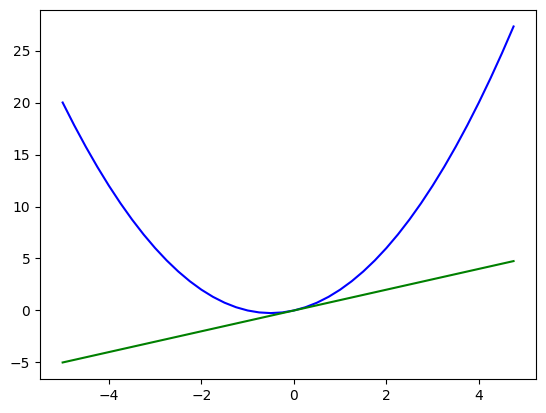

In [6]:
x1_values = np.arange(-5, 5, 0.25)
x2_values = np.arange(-5, 5, 0.25)
x3_values = np.arange(-5, 5, 0.25)

# f(), f'() vs x1
plt.plot(x1_values, f(x1_values, x2_values, x3_values), 'b', x1_values, df_dx1(x1_values, x2_values, x3_values), 'g')

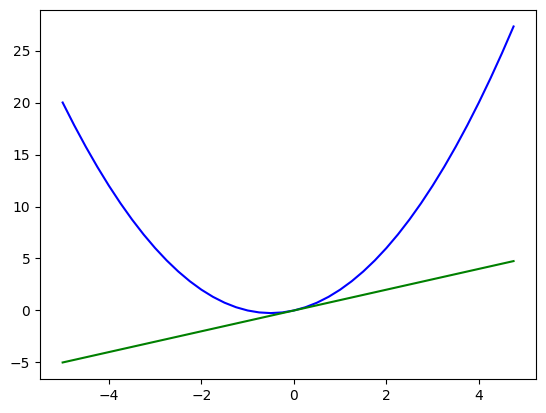

In [7]:
# f(), f'() vs x2
plt.plot(x2_values, f(x1_values, x2_values, x3_values), 'b', x2_values, df_dx2(x1_values, x2_values, x3_values), 'g')

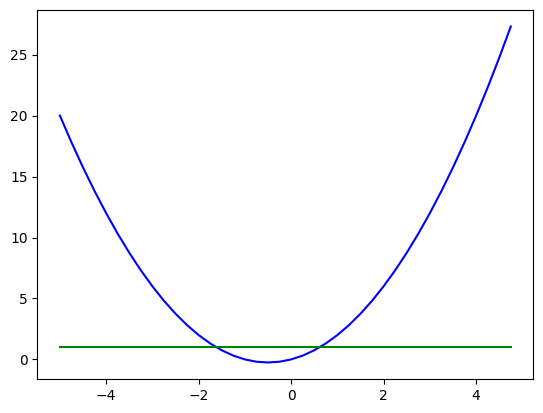

In [8]:
# f(), f'() vs x3
plt.plot(x3_values, f(x1_values, x2_values, x3_values), 'b', x3_values, df_dx3(x1_values, x2_values, x3_values), 'g')

In [9]:
# we can see, as f() was x1 * x2 + x3,
# we see the curve is a parabolla, and the 3D plot would have been a bowl shaped curve
# we also see df/dx3 slope is flat, as it is like a constant in the equn

In [10]:
# since most of the neural networks are following this type of equations 
# followed by a non-linearity at the neuron node (activation fn):
# input -> weights * feature x + bias -> non-linear activation function -> out to next layer
# node_out = act_fn(wX + b)
# 
# we can expect this type of grads in our neural networks, and whatever the grad is of the activation function